# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np


from sklearn.datasets import make_circles, load_boston

from sklearn.model_selection import train_test_split as tts

from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [35]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split as tts # el alias es cosa mia

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
from sklearn.linear_model import LinearRegression as LinReg

linreg=LinReg()

linreg.fit(X_train, y_train)
y_pred =linreg.predict(X_test)[:10]


## 3. Calculate and print R-squared for both the training and the testing set.

In [30]:
# modelo

rf=RFR()   # inicializar el modelo

rf.fit(X_train, y_train)   # entrenar el modelo

train_score=rf.score(X_train, y_train)    # R2
test_score=rf.score(X_test, y_test)

print (train_score, test_score)
# si el train score es mayor que el test:_score es lo normal


0.984033119902187 0.8122819377026024


## 4. Calculate and print mean squared error for both the training and the testing set.

In [31]:
# cuanto mas cerca de 0 mejor
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred)

16.16543403921568

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [32]:

# cuanto mas cerca de 0 mejor

from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

mae(y_test, y_pred)

2.481745098039214

## Classification Model Evaluation

In [33]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [55]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [36]:
from sklearn.model_selection import train_test_split as tts # el alias es cosa mia

X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [37]:
from sklearn.linear_model import LogisticRegression as LogReg

logreg=LogReg()

logreg.fit(X_train, y_train)

y_pred_logreg=logreg.predict(X_test)

y_pred_logreg[:5]

array([0, 2, 1, 2, 1])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [38]:
logreg.score(X_test, y_test)


0.9333333333333333

In [39]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred_logreg)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [ ]:
# no need

## 10. Calculate and print the precision score for both the training and the testing set.

In [56]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred_logreg, average='macro')


0.9444444444444445

## 11. Calculate and print the recall score for both the training and the testing set.

In [48]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred_logreg, average='macro')

0.9523809523809524

## 12. Calculate and print the F1 score for both the training and the testing set.

In [49]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred_logreg, average='macro')

0.9440559440559441

## 13. Generate confusion matrices for both the training and the testing set.

In [52]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred_logreg)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 12]])

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

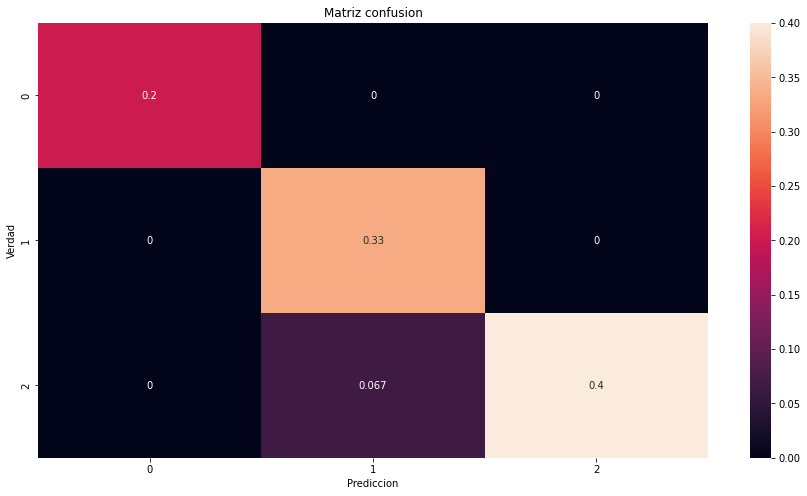

In [54]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg)/sum(sum(cm(y_test, y_pred_logreg))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [ ]:
# entiendo que las casillas en 0 no tienen errores, y las que estan en diagonal son las buenas , dicen la verdad. Y la morada dice que 1 deberia ser 2.

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.